In [3]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 0. Check Current Working Directory

In [4]:
import os

print(os.getcwd())

c:\Users\Akhil\Python_Projects\KN-CV-Workshop\6-Oct


# 1. Load your trained model

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1) # Channel of 3 implicitly expects RGB image
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # (num_channels=64, height=28, width=28)
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 3)  # 3 classes: car, person, dog

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Flatten the output
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        # x = F.softmax(x, dim=1)
        return x
# 2. Initialize the model
model = DeepCNN()

# 3. Load the saved weights into the model
model.load_state_dict(torch.load('./deep_cnn_model.pth'))

# 4. Set the model to evaluation mode
model.eval()

C:\Users\Akhil\AppData\Local\Temp\ipykernel_14268\3013659077.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./deep_cnn_model.pth'))


DeepCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)


# 2. Define the same preprocessing transforms used during training

In [13]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the size your model expects
    transforms.ToTensor(),  # Convert the image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])

# 3. Load and Preprocess the New Image

In [66]:

def load_image(image_path):
    img = Image.open(image_path).convert("RGB")  # Ensure 3 channels (RGB)
    img = transform(img)  # Apply the preprocessing steps
    img = img.unsqueeze(0)  # Add batch dimension (1, 3, 224, 224)
    return img

# Example image paths
image_paths = ['./data/images/car/car_22.jpg', './data/images/dog/dog_1.jpg','./data/images/person/person_19.jpg','./data/images/dog/dog_15.jpg',
               './data/images/person/person_10.jpg','./data/images/car/car_15.jpeg','./data/images/dog/dog_2.jpg',
               './data/images/car/car_13.jpg'
               ]  # Add your image paths here


# 4. Perform Prediction

In [67]:

def predict_image(model, image_tensor):
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(image_tensor)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get the index of the max probability
    return predicted


# 5. Plot Predictions

In [68]:

def plot_predictions(image_paths, predictions, class_names):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 5, 5))
    if num_images == 1:
        axes = [axes]  # Ensure axes is iterable for single image case
    
    for idx, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        axes[idx].imshow(img)
        axes[idx].set_title(f"Predicted: {class_names[predictions[idx]]}")
        axes[idx].axis('off')
    plt.show()

# 6. Load and Predict for Each Image



In [69]:

class_names = ['car', 'dog', 'person']  # Update with your class names
predictions = []

for image_path in image_paths:
    img_tensor = load_image(image_path)  # Load and preprocess the image
    pred = predict_image(model, img_tensor)  # Get the prediction
    predictions.append(pred.item())  # Convert to a scalar (class index)

# 7. Visualize the Predictions


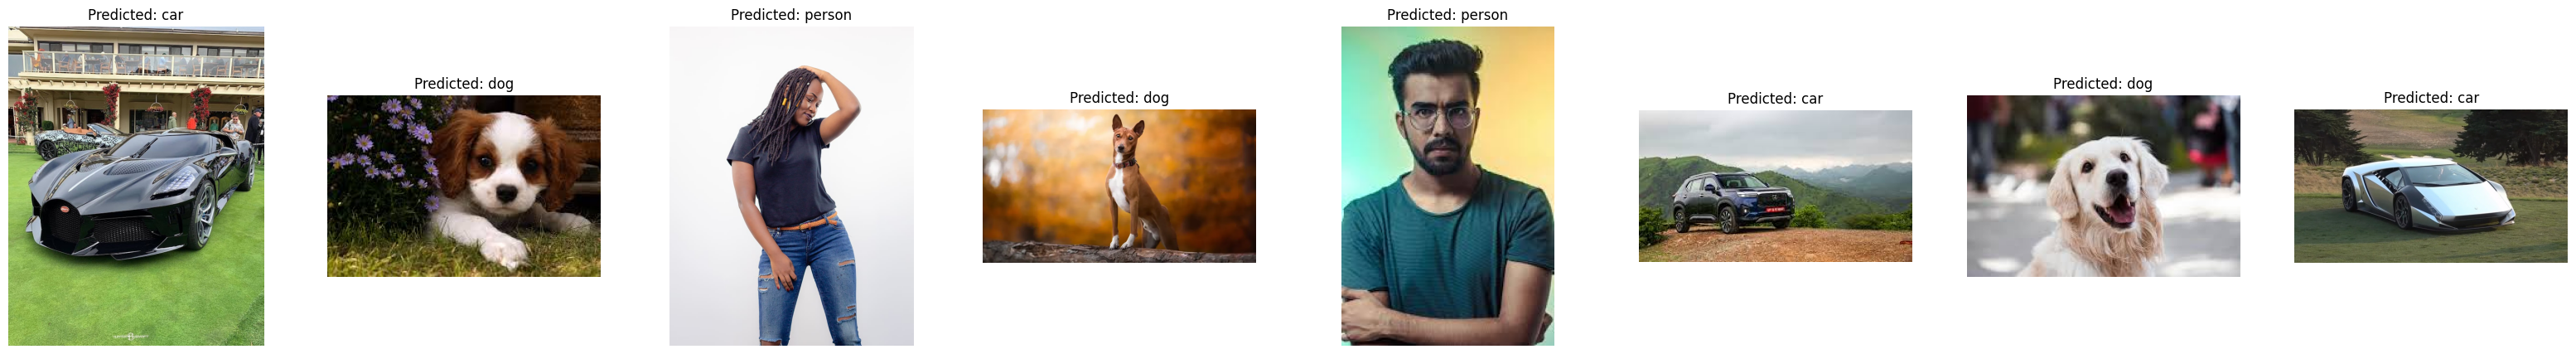

In [70]:

plot_predictions(image_paths, predictions, class_names)

